# Google Drive のマウント

In [ ]:
from google.colab import drive
from pathlib import Path

drive.mount("/drive")
drive_dir = Path("/drive")

# 必要なパッケージのインストール

リポジトリのルートディレクトリを指定してください。

In [ ]:
root_dir = drive_dir / "MyDrive/Colab Notebooks/book-llm-from-scratch-main"

In [ ]:
%cd {root_dir.resolve().as_posix()}
%pip install .

# 2.4 Transformer を作る

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import japanize_matplotlib

In [16]:
xs = np.linspace(-10, 10, 100)
ys1 = norm.pdf(xs, loc=0, scale=1)
ys2 = norm.pdf(xs, loc=2, scale=3)

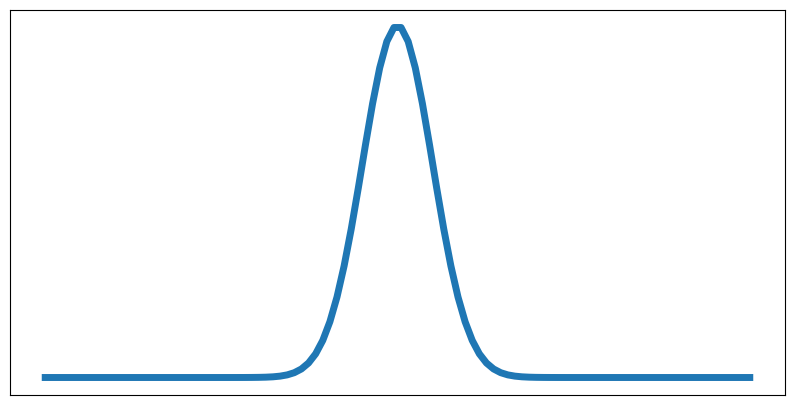

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xs, ys1, lw=5)
# remove ticks
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("layer1_output.pdf")

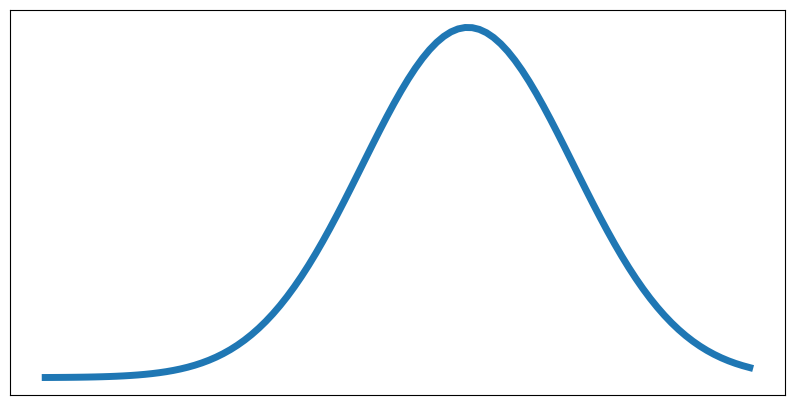

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xs, ys2, lw=5)
# remove ticks
ax.set_xticks([])
ax.set_yticks([])
fig.savefig("layer2_output.pdf")

In [36]:
def cross_entropy(p, q):
    return -np.sum(p * np.log(q))

1.54529908211736


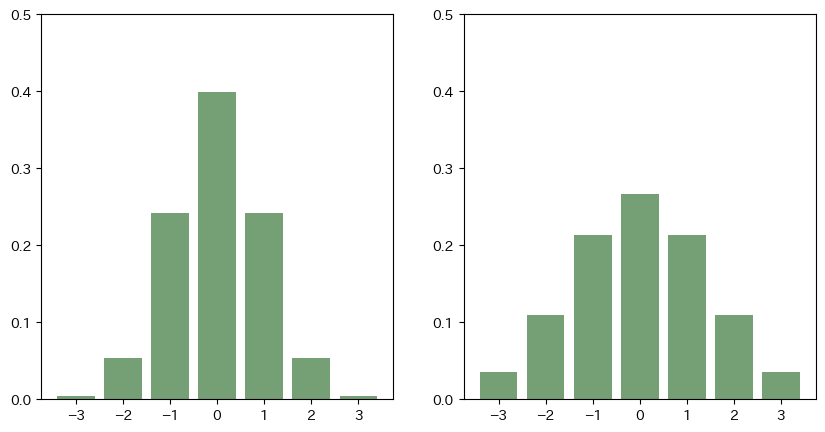

In [59]:
GREEN = "#75a075"
# ガウス分布の離散化
xs = np.linspace(-3, 3, 7)
ys_gauss1 = norm.pdf(xs, loc=0, scale=1)
ys_gauss2 = norm.pdf(xs, loc=0, scale=1.5)
ys_uniform = np.ones_like(xs) / len(xs)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].bar(xs, ys_gauss1, color=GREEN)
axes[1].bar(xs, ys_gauss2, color=GREEN)
for ax in axes.flatten():
    ax.set_ylim(0, 0.5)
print(cross_entropy(ys_gauss1, ys_gauss2))
fig.savefig("cross_entropy1.pdf")

1.9453835065509217


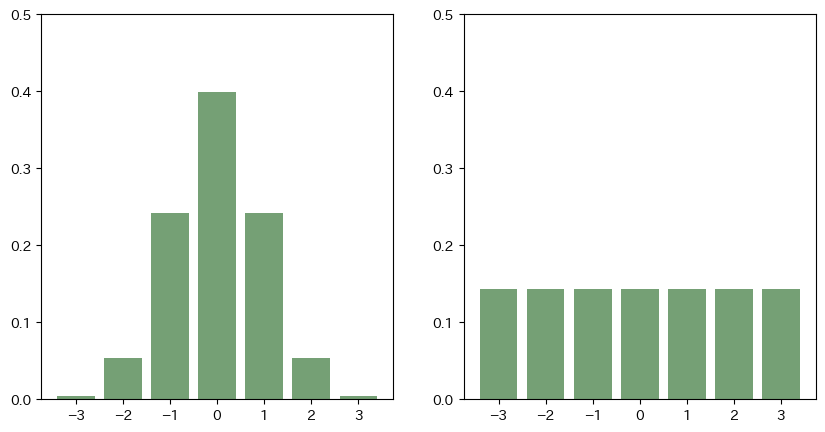

In [61]:
GREEN = "#75a075"
# ガウス分布の離散化
xs = np.linspace(-3, 3, 7)
ys_gauss1 = norm.pdf(xs, loc=0, scale=1)
ys_gauss2 = norm.pdf(xs, loc=0, scale=1.5)
ys_uniform = np.ones_like(xs) / len(xs)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].bar(xs, ys_gauss1, color=GREEN)
axes[1].bar(xs, ys_uniform, color=GREEN)
for ax in axes.flatten():
    ax.set_ylim(0, 0.5)
print(cross_entropy(ys_gauss1, ys_uniform))
fig.savefig("cross_entropy2.pdf")

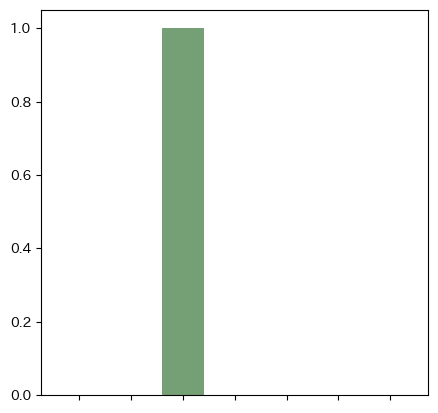

In [68]:
GREEN = "#75a075"
# ガウス分布の離散化
xs = np.linspace(-3, 3, 7)
x_labels = ["吾輩", "僕", "猫", "犬", "ます", "です", "。"]
ys = np.zeros(7)
ys[2] = 1.0

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xticklabels([])

ax.bar(x_labels, ys, color=GREEN)
fig.savefig("one_hot.pdf")

In [70]:
import torch
from torch import nn

p1 = torch.tensor([0.1, 0.2, 0.7])
p2 = torch.tensor([0.7, 0.2, 0.1])

cross_entropy = nn.CrossEntropyLoss()
cross_entropy(p1, p2)

tensor(1.2879)